# Unit 2B Portfolio Project

UNIT 2B PORTFOLIO PROJECT NOTEBOOK

WRITTEN FROM SCRATCH BY: [RYAN ZERNACH](http://ryan.zernach.com/portfolio/)

![alt text](https://ryan.zernach.com/wp-content/uploads/brizy/503/assets/images/iW=440&iH=440&oX=0&oY=0&cW=440&cH=440/Ryan_Zernach_The_Zernach_Foundation_0.png)

### Air Flights Datasets Courtesy of Department of Transportation's [Bureau of Transportation Statistics](https://www.transtats.bts.gov/Tables.asp?DB_ID=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20%28DB1B%29&DB_Short_Name=Origin%20and%20Destination%20Survey) (once link is clicked, select "DB1BMarket") — Data is from 2018 flights in Q1, Q2, Q3, and Q4 that originate somewhere in the USA and have a. destination of somewhere in the USA (USA includes Alaska, Hawaii, and US territories)

# PART 0 — I had to do a bunch of data cleaning/wrangling to slim and refine my multiple datasets from a total of 27M+ rows and 42 columns down to a new total of 9M rows and 12 columns. After consolidating, I exported the file and then uploaded the cleaned data for use in Part 1, but I still wanted to [show all my work](https://colab.research.google.com/drive/1TjZ19xNmPREin1wmech0sSbGs_OeXWxA) (in a diffent notebook) of cleaning it up.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd

# Requests an authentication code, which is received by clicking the unique link
# that it provides when this code cell is run...
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Searches for all files that contain "2018 Flights" and are within
# the Google Drive Folder with the long, seemingly-random extension shown in orange
listed = drive.ListFile({'q': "title contains '2018 Flights' and '1yEHzS1W5Z413DFrlE0aZvvARRzHFXzJb' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Cleaned 2018 Flights Data.csv, id 1G_1zuLamAeMBx5X-s8E-9kkhDqJjsydg


In [ ]:
# Honestly haven't looked into what the following (5) lines do, but they magically make it work. Run it.
download_path = os.path.expanduser('~/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

# Using the 'title' and 'id' shown in the output two cells above, copy/paste
# that information into the following:
output_file = os.path.join(download_path, 'Cleaned 2018 Flights Data.csv')
temp_file = drive.CreateFile({'id': '1G_1zuLamAeMBx5X-s8E-9kkhDqJjsydg'})
temp_file.GetContentFile(output_file)

# Read in the file as a csv
flights = pd.read_csv(output_file)
# Drop the unnamed column
flights = flights.drop(['Unnamed: 0', 'ItinID', 'MktCoupons', 'MktID'], axis=1)
flights

,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35
...,...,...,...,...,...,...,...,...,...,...
9534412,4,STL,64,AUS,74,721.0,2,1.0,WN,310.10
9534413,4,BNA,54,MCI,64,491.0,2,1.0,WN,106.17
9534414,4,BOS,13,LIT,71,1260.0,2,1.0,WN,161.19
9534415,4,BOS,13,LIT,71,1260.0,2,1.0,WN,170.87


In [ ]:
origin = 'DFW'
dest = 'ORD'

miles_df =flights[(flights['Origin'] == origin) & (flights['Dest'] == dest)]
miles_df['Miles']

30232      802.0
37643      802.0
41536      802.0
44670      802.0
52841      802.0
           ...  
9184403    802.0
9198766    802.0
9198768    802.0
9243685    802.0
9244644    802.0
Name: Miles, Length: 11583, dtype: float64

In [ ]:
test['Miles'].describe()

count    11583.0
mean       802.0
std          0.0
min        802.0
25%        802.0
50%        802.0
75%        802.0
max        802.0
Name: Miles, dtype: float64

In [ ]:
flights.dtypes

Quarter                int64
Origin                object
OriginWac              int64
Dest                  object
DestWac                int64
Miles                float64
ContiguousUSA          int64
NumTicketsOrdered    float64
AirlineCompany        object
PricePerTicket       float64
dtype: object

# PART 1 — Begin data analytics by evaluating data distribution.

### 1.1) Are there any null values anywhere?

In [ ]:
flights.isnull().sum()

MktID                0
Quarter              0
Origin               0
OriginWac            0
Dest                 0
DestWac              0
Miles                0
ContiguousUSA        0
NumTicketsOrdered    0
AirlineCompany       0
PricePerTicket       0
dtype: int64

### 1.2) What's the distribution/frequency of ['NumTicketsOrdered']?

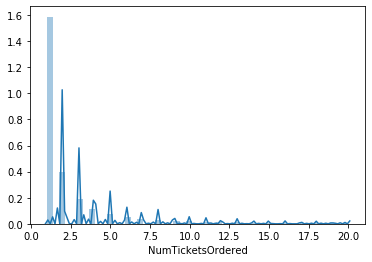

In [ ]:
import seaborn as sns
x = flights['NumTicketsOrdered']
sns.distplot(x)

### 1.3) What's the distribution/frequency of ['AirlineCompany']?

In [ ]:
# This was taking forever to load, so I just commented it out:
#x2 = flights['AirlineCompany']
#sns.distplot(x2)

In [ ]:
flights['AirlineCompany'].value_counts()

WN    2341253
DL    1771439
AA    1461018
UA    1415862
B6     716111
AS     622855
G4     384958
NK     350719
F9     253548
HA     123449
SY      63406
VX      29799
Name: AirlineCompany, dtype: int64

The (12) Remaining Airline Companies After Data Refinement. These 2-letter codes are from the Department of Transportation's [Bureau of Transportation Statistics](https://www.transtats.bts.gov/Tables.asp?DB_ID=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20%28DB1B%29&DB_Short_Name=Origin%20and%20Destination%20Survey) --
* WN --	Southwest Airlines Co.
* DL --	Delta Air Lines Inc.
* AA --	American Airlines Inc.
* UA --	United Air Lines Inc.
* B6 --	JetBlue Airways
* AS --	Alaska Airlines Inc.
* NK --	Spirit Air Lines
* G4 --	Allegiant Air
* F9 --	Frontier Airlines Inc.
* HA --	Hawaiian Airlines Inc.
* SY --	Sun Country Airlines d/b/a MN Airlines
* VX --	Virgin America



### 1.4) What's the distribution/frequency of ['PricePerTicket']?

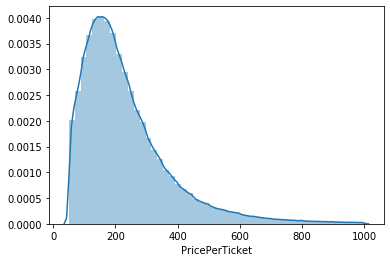

In [ ]:
import seaborn as sns
y = flights['PricePerTicket']
sns.distplot(y)

In [ ]:
flights['PricePerTicket'].describe()

count    9.534417e+06
mean     2.324497e+02
std      1.433412e+02
min      5.000000e+01
25%      1.339100e+02
50%      1.971900e+02
75%      2.900000e+02
max      1.000000e+03
Name: PricePerTicket, dtype: float64

### 1.5) What's the distribution/frequency of ['Miles']?

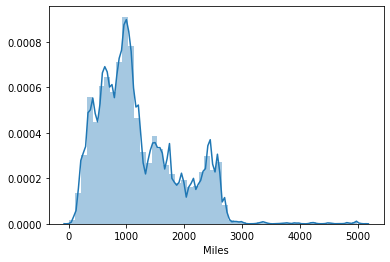

In [ ]:
import seaborn as sns
y2 = flights['Miles']
sns.distplot(y2)

### 1.6) What's the spread of PricePerTicket vs. Miles?

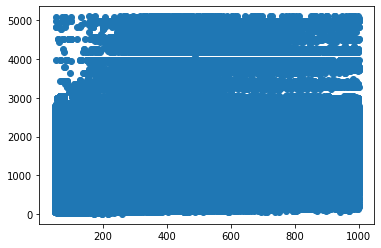

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(flights['PricePerTicket'], flights['Miles'])

### 1.7) Set aside lists of AirlineCompany values, Dest values, and Origin values for using in user interface web app later

In [ ]:
airlinecompanies = sorted(list(flights['AirlineCompany'].unique()))

In [ ]:
origins = sorted(list(flights['Origin'].unique()))

In [ ]:
destinations = sorted(list(flights['Dest'].unique()))

In [ ]:
len(origins)

263

# PART 2 -- Split the data, fit predictive models, and validate the model's r^2 score.

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.4MB/s 


### 2.1) Split the data into train/validate/test

In [ ]:
flights = flights.drop(columns = ['OriginWac', 'DestWac', 'ContiguousUSA'])
flights

,Quarter,Origin,Dest,Miles,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,1,PHL,LAX,2402.0,1.0,AA,672.87
1,1,PHL,LAX,2402.0,1.0,AA,367.68
2,1,PHL,LAX,2402.0,1.0,AA,417.94
3,1,PHL,LAX,2402.0,1.0,AA,247.10
4,1,PHL,LAX,2402.0,1.0,AA,276.35
...,...,...,...,...,...,...,...
9534412,4,STL,AUS,721.0,1.0,WN,310.10
9534413,4,BNA,MCI,491.0,1.0,WN,106.17
9534414,4,BOS,LIT,1260.0,1.0,WN,161.19
9534415,4,BOS,LIT,1260.0,1.0,WN,170.87


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(flights, train_size = 0.70, test_size = 0.30, random_state=42)

train, val = train_test_split(train, train_size = 0.50, test_size = 0.50, random_state=42)

train.shape, val.shape, test.shape

((3337045, 7), (3337046, 7), (2860326, 7))

### 2.2) Identify target, features, x_train/val/test, and y_train/val/test

In [ ]:
target = ['PricePerTicket']
features = flights.columns.drop(target)

x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

x_test = test[features]
y_test = test[target]

#x_pickle_data = pickle_data[features]
#y_pickle_data = pickle_data[target]

### 2.3) Encode the categorical variables and train a RandomForest model using the training data. Then, use the validation set to check the model's R² score.

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(max_depth=20, n_estimators=20)
)

pipeline.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Origin', 'Dest', 'AirlineCompany'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Origin',
                                          'data_type': dtype('O'),
                                          'mapping': DFW      1
TPA      2
BUR      3
LGA      4
DEN      5
      ... 
FLG    246
JHM    247
RKS    248
BFL    249
NaN     -2
Length: 250, dtype: int64},
                                         {'col': 'Dest',
                                          'data_type': dtype('O'),
                                          'mapping': O...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=20,
                                       max_features='auto', max_leaf_nodes=None,
   

In [ ]:
from sklearn.metrics import r2_score
y_pred = pipeline.predict(x_val)
print('RandomForest R^2 Score = ', r2_score(y_val, y_pred))

RandomForest R^2 Score =  0.3256194355489812


### 2.4) Dump the pipeline model into a file to add to my git repo for the heroku web app

In [ ]:
from joblib import dump
dump(pipeline, 'pipeline.joblib', compress=9)

['pipeline.joblib']

In [ ]:
import joblib
import sklearn
import category_encoders as ce
import pandas as pd
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'pandas=={ce.__version__}')

joblib==0.14.0
scikit-learn==0.21.3
category_encoders==2.1.0
pandas==2.1.0


### 2.5) Train five more separate models for each of the top (5) airline companies

In [ ]:
# Train Sets -- Top 5 Airline Company Specific
train_delta = train[train['AirlineCompany'] == 'DL']
train_southwest = train[train['AirlineCompany'] == 'WN']
train_american = train[train['AirlineCompany'] == 'AA']
train_united = train[train['AirlineCompany'] == 'UA']
train_jetblue = train[train['AirlineCompany'] == 'B6']

# Validation Sets -- Top 5 Airline Company Specific
val_delta = val[val['AirlineCompany'] == 'DL']
val_southwest = val[val['AirlineCompany'] == 'WN']
val_american = val[val['AirlineCompany'] == 'AA']
val_united = val[val['AirlineCompany'] == 'UA']
val_jetblue = val[val['AirlineCompany'] == 'B6']

target = ['PricePerTicket']
features = flights.columns.drop(target)

# Delta
xtd = train_delta[features]
ytd = train_delta[target]
xvd = val_delta[features]
yvd = val_delta[target]

# Southwest
xts = train_southwest[features]
yts = train_southwest[target]
xvs = val_southwest[features]
yvs = val_southwest[target]

# American
xta = train_american[features]
yta = train_american[target]
xva = val_american[features]
yva = val_american[target]

# United
xtu = train_united[features]
ytu = train_united[target]
xvu = val_united[features]
yvu = val_united[target]

# Jetblue
xtj = train_jetblue[features]
ytj = train_jetblue[target]
xvj = val_jetblue[features]
yvj = val_jetblue[target]

# Encode the categorical variables
encoder = OrdinalEncoder()
xtd = encoder.fit_transform(xtd, ytd)
xvd = encoder.fit_transform(xvd, yvd)
xts = encoder.fit_transform(xts, yts)
xvs = encoder.fit_transform(xvs, yvs)
xta = encoder.fit_transform(xta, yta)
xva = encoder.fit_transform(xva, yva)
xtu = encoder.fit_transform(xtu, ytu)
xvu = encoder.fit_transform(xvu, yvu)
xtj = encoder.fit_transform(xtj, ytj)
xvj = encoder.fit_transform(xvj, yvj)

# Random Forest Models
model_d = RandomForestRegressor()
model_s = RandomForestRegressor()
model_a = RandomForestRegressor()
model_u = RandomForestRegressor()
model_j = RandomForestRegressor()

model_d.fit(xtd, ytd)
model_s.fit(xts, yts)
model_a.fit(xta, yta)
model_u.fit(xtu, ytu)
model_j.fit(xtj, ytj)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### 2.6) How did the OrdinalEncoder in the pipeline encode the categorical variables? Assign those dictionaries to variables.

In [ ]:
pipeline_encoder = pipeline.named_steps['ordinalencoder']
mapping = pipeline_encoder.mapping

origin_dict = dict(mapping[0])
dest_dict = mapping[1]
airline_dict = mapping[2]

In [ ]:
origin_dict['mapping'].index[0]

'DFW'

In [ ]:
pd.Series.to_json(origin_dict['mapping'])

'{"DFW":1,"TPA":2,"BUR":3,"LGA":4,"DEN":5,"MDW":6,"SJC":7,"CLT":8,"JFK":9,"IAH":10,"CVG":11,"PHL":12,"FLL":13,"ATL":14,"SJU":15,"SFB":16,"MSP":17,"PIA":18,"OKC":19,"ORD":20,"PHX":21,"BWI":22,"AUS":23,"OAK":24,"RSW":25,"MCO":26,"MSY":27,"SLC":28,"LAX":29,"MKE":30,"LAS":31,"PIT":32,"SAN":33,"DTW":34,"EWR":35,"ABQ":36,"MCI":37,"BNA":38,"SFO":39,"BDL":40,"SMF":41,"IAD":42,"HNL":43,"BOS":44,"MIA":45,"PIE":46,"HOU":47,"PVU":48,"RIC":49,"ANC":50,"PBI":51,"SEA":52,"DCA":53,"OGG":54,"SAV":55,"SAT":56,"SNA":57,"IND":58,"ATW":59,"JAC":60,"BQN":61,"ONT":62,"CLE":63,"JAX":64,"FAI":65,"ICT":66,"DAL":67,"ROC":68,"LGB":69,"DAB":70,"PDX":71,"AZA":72,"MEM":73,"SGF":74,"RDU":75,"ECP":76,"PWM":77,"GSO":78,"SMX":79,"HPN":80,"MHT":81,"EUG":82,"CMH":83,"CAE":84,"BIL":85,"MYR":86,"ELP":87,"SBN":88,"PSP":89,"DSM":90,"OMA":91,"STL":92,"KOA":93,"GRI":94,"VPS":95,"GRR":96,"FSD":97,"PGD":98,"BUF":99,"GEG":100,"AVL":101,"SCK":102,"TTN":103,"LIH":104,"ORF":105,"TUS":106,"RNO":107,"CHS":108,"CAK":109,"BMI":110,"BLV":

In [ ]:
 {'label': 'Southwest Airline Co. (WN)', 'value': 2},

In [ ]:
origin_string_dict = ''
for row in origin_dict['mapping']:
    origin_string_dict += ("{")
    origin_string_dict += (f"'label': '{origin_dict['mapping'].index[row]}', 'value': {origin_dict['mapping'][row]}")
    origin_string_dict += ("}, ")

In [ ]:
origin_string_dict

"{'label': 'TPA', 'value': 2}, {'label': 'BUR', 'value': 3}, {'label': 'LGA', 'value': 4}, {'label': 'DEN', 'value': 5}, {'label': 'MDW', 'value': 6}, {'label': 'SJC', 'value': 7}, {'label': 'CLT', 'value': 8}, {'label': 'JFK', 'value': 9}, {'label': 'IAH', 'value': 10}, {'label': 'CVG', 'value': 11}, {'label': 'PHL', 'value': 12}, {'label': 'FLL', 'value': 13}, {'label': 'ATL', 'value': 14}, {'label': 'SJU', 'value': 15}, {'label': 'SFB', 'value': 16}, {'label': 'MSP', 'value': 17}, {'label': 'PIA', 'value': 18}, {'label': 'OKC', 'value': 19}, {'label': 'ORD', 'value': 20}, {'label': 'PHX', 'value': 21}, {'label': 'BWI', 'value': 22}, {'label': 'AUS', 'value': 23}, {'label': 'OAK', 'value': 24}, {'label': 'RSW', 'value': 25}, {'label': 'MCO', 'value': 26}, {'label': 'MSY', 'value': 27}, {'label': 'SLC', 'value': 28}, {'label': 'LAX', 'value': 29}, {'label': 'MKE', 'value': 30}, {'label': 'LAS', 'value': 31}, {'label': 'PIT', 'value': 32}, {'label': 'SAN', 'value': 33}, {'label': 'DTW'

In [ ]:
origin_string2_dict = '{'
for row in origin_dict['mapping']:
    origin_string2_dict += (f"{origin_dict['mapping'][row]}: '{origin_dict['mapping'].index[row]}', ")

In [ ]:
origin_string2_dict

"{2: 'TPA', 3: 'BUR', 4: 'LGA', 5: 'DEN', 6: 'MDW', 7: 'SJC', 8: 'CLT', 9: 'JFK', 10: 'IAH', 11: 'CVG', 12: 'PHL', 13: 'FLL', 14: 'ATL', 15: 'SJU', 16: 'SFB', 17: 'MSP', 18: 'PIA', 19: 'OKC', 20: 'ORD', 21: 'PHX', 22: 'BWI', 23: 'AUS', 24: 'OAK', 25: 'RSW', 26: 'MCO', 27: 'MSY', 28: 'SLC', 29: 'LAX', 30: 'MKE', 31: 'LAS', 32: 'PIT', 33: 'SAN', 34: 'DTW', 35: 'EWR', 36: 'ABQ', 37: 'MCI', 38: 'BNA', 39: 'SFO', 40: 'BDL', 41: 'SMF', 42: 'IAD', 43: 'HNL', 44: 'BOS', 45: 'MIA', 46: 'PIE', 47: 'HOU', 48: 'PVU', 49: 'RIC', 50: 'ANC', 51: 'PBI', 52: 'SEA', 53: 'DCA', 54: 'OGG', 55: 'SAV', 56: 'SAT', 57: 'SNA', 58: 'IND', 59: 'ATW', 60: 'JAC', 61: 'BQN', 62: 'ONT', 63: 'CLE', 64: 'JAX', 65: 'FAI', 66: 'ICT', 67: 'DAL', 68: 'ROC', 69: 'LGB', 70: 'DAB', 71: 'PDX', 72: 'AZA', 73: 'MEM', 74: 'SGF', 75: 'RDU', 76: 'ECP', 77: 'PWM', 78: 'GSO', 79: 'SMX', 80: 'HPN', 81: 'MHT', 82: 'EUG', 83: 'CMH', 84: 'CAE', 85: 'BIL', 86: 'MYR', 87: 'ELP', 88: 'SBN', 89: 'PSP', 90: 'DSM', 91: 'OMA', 92: 'STL', 93: '

In [ ]:
dest_string_dict = ''
for row in dest_dict['mapping']:
    dest_string_dict += ("{")
    dest_string_dict += (f"'label': '{dest_dict['mapping'].index[row]}', 'value': {dest_dict['mapping'][row]}")
    dest_string_dict += ("}, ")

In [ ]:
dest_string_dict

NameError: ignored

In [ ]:
dest_string2_dict = '{'
for row in dest_dict['mapping']:
    dest_string2_dict += (f"{dest_dict['mapping'][row]}: '{dest_dict['mapping'].index[row]}', ")

In [ ]:
dest_dict = {2: 'ISP', 3: 'SEA', 4: 'CLT', 5: 'JAX', 6: 'TPA', 7: 'MCO', 8: 'MDW', 9: 'DTW', 10: 'MSY', 11: 'LAX', 12: 'DEN', 13: 'MCI', 14: 'BQN', 15: 'LGA', 16: 'BWI', 17: 'PSM', 18: 'AZA', 19: 'PHX', 20: 'DFW', 21: 'EWR', 22: 'ONT', 23: 'MKE', 24: 'SAT', 25: 'BOS', 26: 'ELM', 27: 'JFK', 28: 'LIH', 29: 'PBI', 30: 'MSP', 31: 'LAS', 32: 'DAL', 33: 'RIC', 34: 'ANC', 35: 'OAK', 36: 'CVG', 37: 'SAN', 38: 'CHS', 39: 'ELP', 40: 'MIA', 41: 'LGB', 42: 'HNL', 43: 'FLL', 44: 'IAD', 45: 'PVD', 46: 'OGG', 47: 'CHA', 48: 'SLC', 49: 'BUR', 50: 'PWM', 51: 'ATL', 52: 'PDX', 53: 'FAT', 54: 'SFO', 55: 'SMF', 56: 'AUS', 57: 'RSW', 58: 'STL', 59: 'CLE', 60: 'MEM', 61: 'PHL', 62: 'SJC', 63: 'HOU', 64: 'PNS', 65: 'SAV', 66: 'DCA', 67: 'IAH', 68: 'SNA', 69: 'SJU', 70: 'TUL', 71: 'BNA', 72: 'CMH', 73: 'SDF', 74: 'PSP', 75: 'MAF', 76: 'RNO', 77: 'TUS', 78: 'GFK', 79: 'ALB', 80: 'KOA', 81: 'ABQ', 82: 'BGR', 83: 'GTF', 84: 'RDU', 85: 'FSD', 86: 'BOI', 87: 'GRR', 88: 'OMA', 89: 'PIT', 90: 'SIT', 91: 'HPN', 92: 'IND', 93: 'BUF', 94: 'PGD', 95: 'PIE', 96: 'GEG', 97: 'BRW', 98: 'BDL', 99: 'SGF', 100: 'SFB', 101: 'PBG', 102: 'DSM', 103: 'STX', 104: 'ITO', 105: 'MLI', 106: 'ATW', 107: 'JAC', 108: 'MYR', 109: 'COS', 110: 'LCK', 111: 'CAK', 112: 'JAN', 113: 'BIL', 114: 'BHM', 115: 'ORF', 116: 'SRQ', 117: 'FWA', 118: 'OME', 119: 'PVU', 120: 'VPS', 121: 'MHT', 122: 'PIA', 123: 'MLB', 124: 'MTJ', 125: 'HRL', 126: 'MDT', 127: 'SYR', 128: 'OKC', 129: 'ROC', 130: 'STT', 131: 'SCK', 132: 'EUG', 133: 'CID', 134: 'BLI', 135: 'EYW', 136: 'SWF', 137: 'ORH', 138: 'AMA', 139: 'GSO', 140: 'AVL', 141: 'RFD', 142: 'LIT', 143: 'SBN', 144: 'ILM', 145: 'EGE', 146: 'FNT', 147: 'HDN', 148: 'CDV', 149: 'SPI', 150: 'SBA', 151: 'BIS', 152: 'AVP', 153: 'RAP', 154: 'ECP', 155: 'ABE', 156: 'LBB', 157: 'ACK', 158: 'TTN', 159: 'JNU', 160: 'HYA', 161: 'ICT', 162: 'GPT', 163: 'ACY', 164: 'ROA', 165: 'PSE', 166: 'BZN', 167: 'CRP', 168: 'DAY', 169: 'TYS', 170: 'CAE', 171: 'SHV', 172: 'IAG', 173: 'MSN', 174: 'BTR', 175: 'DAB', 176: 'MFE', 177: 'ADQ', 178: 'FAI', 179: 'TLH', 180: 'USA', 181: 'GJT', 182: 'GUC', 183: 'BLV', 184: 'MSO', 185: 'GUM', 186: 'BTV', 187: 'FAR', 188: 'KTN', 189: 'TOL', 190: 'BET', 191: 'EVV', 192: 'HTS', 193: 'GSP', 194: 'CKB', 195: 'STC', 196: 'IDA', 197: 'LBE', 198: 'LEX', 199: 'GRI', 200: 'GST', 201: 'OGS', 202: 'PSC', 203: 'MFR', 204: 'BMI', 205: 'OGD', 206: 'AGS', 207: 'FCA', 208: 'XNA', 209: 'LFT', 210: 'SPN', 211: 'MOT', 212: 'HGR', 213: 'TVC', 214: 'AKN', 215: 'PSG', 216: 'SMX', 217: 'MOB', 218: 'STS', 219: 'LRD', 220: 'MVY', 221: 'OTZ', 222: 'HSV', 223: 'MRY', 224: 'PHF', 225: 'BKG', 226: 'WRG', 227: 'SCC', 228: 'CHO', 229: 'OWB', 230: 'TRI', 231: 'YAK', 232: 'PPG', 233: 'DLH', 234: 'GNV', 235: 'FAY', 236: 'CRW', 237: 'YNG', 238: 'GRB', 239: 'DLG', 240: 'ADK', 241: 'LNK', 242: 'ASE', 243: 'DRO', 244: 'MKG', 245: 'SGU', 246: 'BFL', 247: 'OTH', 248: 'CPR', 249: 'ITH', 250: 'SBP', 251: 'SCE', 252: 'RST', -2: 'nan', 252: 'RST'}

In [ ]:
dest_string2_dict[2]

'ISP'

In [ ]:
for x in dest_dict:
  print(dest_dict[x])

Dest
ORD      1
ISP      2
SEA      3
CLT      4
JAX      5
      ... 
ITH    249
SBP    250
SCE    251
RST    252
NaN     -2
Length: 253, dtype: int64
object


In [ ]:
airline_dict

{'col': 'AirlineCompany', 'data_type': dtype('O'), 'mapping': AA      1
 WN      2
 AS      3
 DL      4
 UA      5
 F9      6
 B6      7
 G4      8
 NK      9
 HA     10
 VX     11
 SY     12
 NaN    -2
 dtype: int64}

In [ ]:
origin_options = flights['Origin'].unique()
miles_string = '{'

for origin in origin_options:
    origin_data = flights[flights['Origin'] == origin]
    unique_dest = origin_data['Dest'].unique()
    for dest in unique_dest:
        dest_data = origin_data[origin_data['Dest'] == dest].reset_index()
        miles_string += f"'{origin}>{dest}':{int(dest_data['Miles'][0])},"
miles_string = miles_string[0:-2]
miles_string += '}'

In [ ]:
miles_string

"{'PHL>LAX':2402,'PHL>LGA':96,'PHL>BOS':280,'PHL>RDU':337,'PHL>MCI':1038,'PHL>MCO':861,'PHL>MHT':289,'PHL>RSW':993,'PHL>MIA':1013,'PHL>MSP':980,'PHL>MSY':1089,'PHL>ORD':678,'PHL>PIT':268,'PHL>BNA':675,'PHL>DFW':1303,'PHL>BDL':196,'PHL>PBI':951,'PHL>PDX':2406,'PHL>PHX':2075,'PHL>PVD':237,'PHL>ATL':666,'PHL>SAN':2370,'PHL>SAT':1496,'PHL>SEA':2378,'PHL>TPA':920,'PHL>SFO':2521,'PHL>SJU':1576,'PHL>SLC':1927,'PHL>STL':814,'PHL>JAX':742,'PHL>DTW':453,'PHL>CLT':449,'PHL>CLE':363,'PHL>LAS':2176,'PHL>IAH':1325,'PHL>JFK':94,'PHL>MKE':690,'PHL>MOB':968,'PHL>MSN':764,'PHL>MSO':1993,'PHL>GEG':2155,'PHL>DEN':1558,'PHL>OGG':4859,'PHL>EGE':1678,'PHL>EWR':80,'PHL>SNA':2380,'PHL>FLL':992,'PHL>AUS':1430,'PHL>CMH':406,'PHL>DCA':119,'PHL>GRR':573,'PHL>MDW':668,'PHL>BOI':2113,'PHL>DAL':1295,'PHL>SMF':2458,'PHL>DSM':972,'PHL>ECP':886,'PHL>ELP':1824,'PHL>HOU':1336,'PHL>ICT':1205,'PHL>LBB':1529,'PHL>CHS':550,'PHL>MAF':1601,'PHL>OAK':2511,'PHL>OKC':1261,'PHL>OMA':1088,'PHL>BUR':2392,'PHL>RNO':2348,'PHL>PNS':935,

In [ ]:
flights

,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35
...,...,...,...,...,...,...,...,...,...,...
9534412,4,STL,64,AUS,74,721.0,2,1.0,WN,310.10
9534413,4,BNA,54,MCI,64,491.0,2,1.0,WN,106.17
9534414,4,BOS,13,LIT,71,1260.0,2,1.0,WN,161.19
9534415,4,BOS,13,LIT,71,1260.0,2,1.0,WN,170.87


### 2.7) Run a RandomizedSearchCV to identify the best model parameters in order to reduce variance in the model

In [ ]:
# I didn't run a RandomizedSearchCV, but wanted to show it as a step in the process for future reference

### 2.8) Using the same encoded data, train a a couple different types of linear regression models to check its R^2 against the RandomForest model (to show that RandomForest is better in this dataset and to show that I know how to use other models for comparing accuracy/error metrics)

In [ ]:
# Encode the categoricals
encoder = OrdinalEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.fit_transform(x_val)
x_test_encoded = encoder.fit_transform(x_test)

# LinearRegression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model2 = LinearRegression()
model2.fit(x_train_encoded, y_train)
y_pred2 = model2.predict(x_val_encoded)
print('LinearRegression R² Score = ', r2_score(y_val, y_pred2))

# RidgeRegression Model
from sklearn.linear_model import Ridge
model3 = Ridge()
model3.fit(x_train_encoded, y_train)
y_pred3 = model3.predict(x_val_encoded)
print('RidgeRegression R² Score = ', r2_score(y_val, y_pred3))

LinearRegression R² Score =  0.17569843633770177
RidgeRegression R² Score =  0.1756984358522562


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02912e-27): result may not be accurate.
  overwrite_a=True).T


# PART 3 — Feature importances & permutation importances.
Global model explanation: all features in relation to each other

#### 3.1) Feature Importances visualization(s)

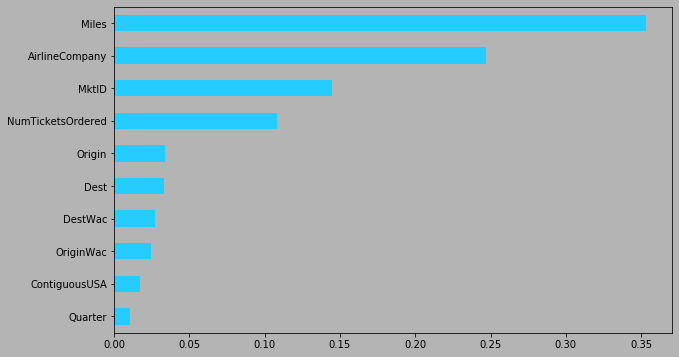

In [ ]:
# Get feature importances
model = pipeline.named_steps['randomforestregressor']
importances = pd.Series(model.feature_importances_, features)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6), facecolor = '#b4b4b4')
ax.set(facecolor='#b4b4b4')
#plt.title('Feature Importances for 2018 Flights Data (Target: PricePerTicket)')
n=12
importances.sort_values()[-n:].plot.barh(color='#24ccff');

### 3.2) Permutation Importances

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 2.7MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    #scoring='neg_mean_absolute_error', 
    n_iter=5, 
    random_state=42
)

permuter.fit(x_val_encoded, y_val)

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=10,
                                                      n_jobs=None,
                                                      oob_score=False,
  

In [ ]:
feature_names = x_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.3271 ± 0.0012,AirlineCompany
0.3079 ± 0.0007,Miles
0.1159 ± 0.0002,MktID
0.0877 ± 0.0008,NumTicketsOrdered
0.0403 ± 0.0003,Origin
0.0371 ± 0.0002,ContiguousUSA
0.0349 ± 0.0003,OriginWac
0.0330 ± 0.0003,DestWac
0.0312 ± 0.0003,Dest
0.0029 ± 0.0002,Quarter


# PART 4 -- Partial Dependence Plots
Global model explanation: individual feature(s) in relation to target

In [ ]:
!pip install pdpbox

### Part 4.1) Plot three PDP's for three different features on the validation dataset

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot

feature1 = 'AirlineCompany'

isolated1 = pdp_isolate(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val.columns, 
    feature=feature1,
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


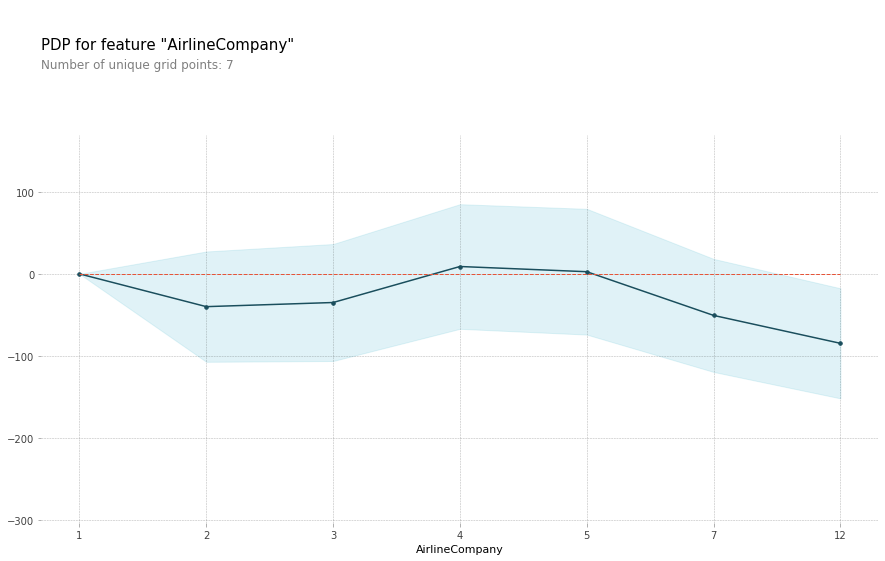

In [ ]:
pdp_plot(isolated1, feature_name=feature1, x_quantile = True);

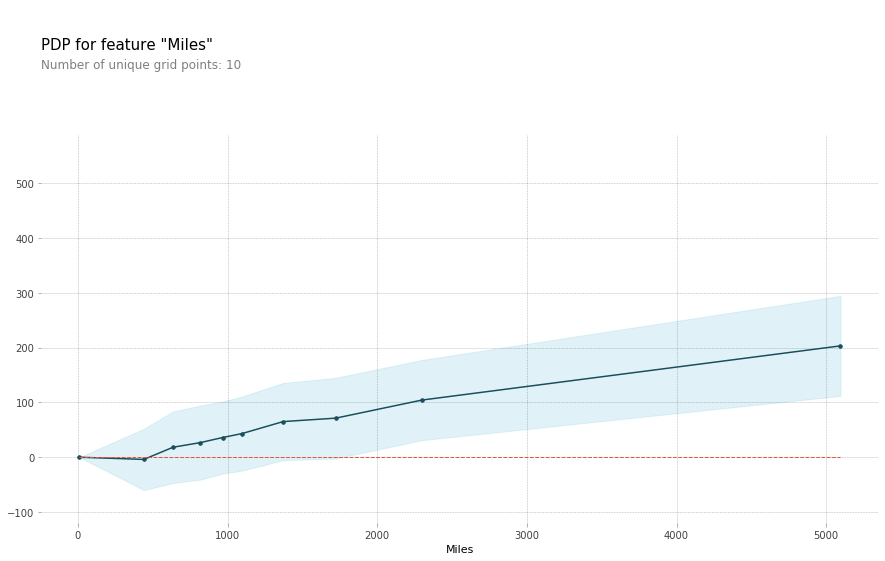

In [ ]:
feature2 = 'Miles'

isolated2 = pdp_isolate(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val.columns, 
    feature=feature2
)

pdp_plot(isolated2, feature_name=feature2);

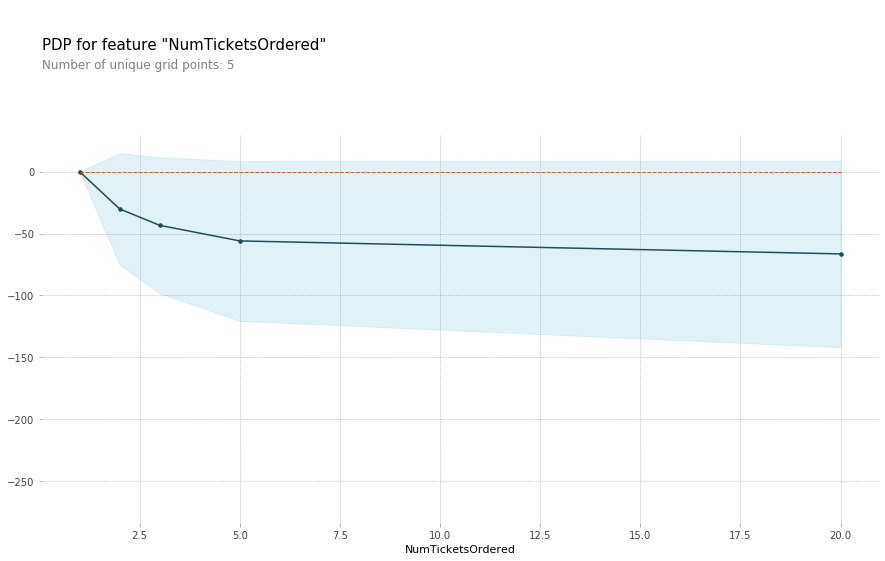

In [ ]:
# Overall NumTix PDP
feature3 = 'NumTicketsOrdered'

isolated3 = pdp_isolate(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val.columns, 
    feature=feature3
)

pdp_plot(isolated3, feature_name=feature3);

### Part 4.2) Plot PDP's for the top five airline companies to visualize the differences that NumTicketsOrdered has on each of the five companies' PricePerTicket target variable

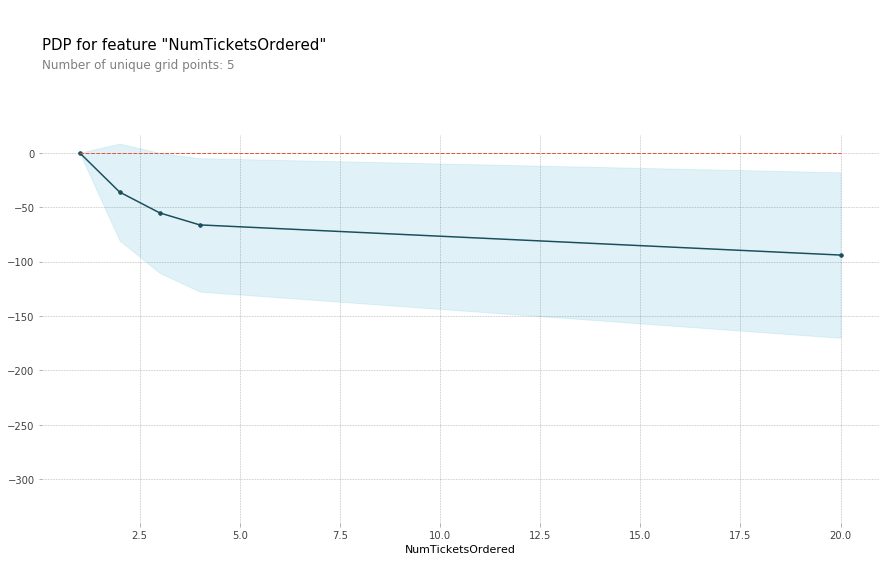

In [ ]:
# Delta NumTix PDP
isolated_delta = pdp_isolate(
    model=model_d, 
    dataset=xvd, 
    model_features=x_val.columns, 
    feature=feature3
)

pdp_plot(isolated_delta, feature_name=feature3);

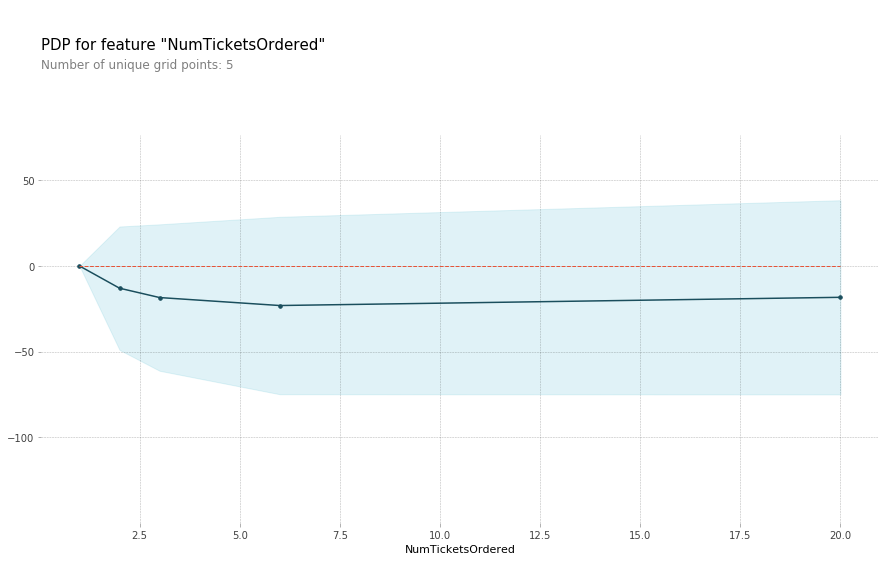

In [ ]:
# Southwest NumTix PDP
isolated_southwest = pdp_isolate(
    model=model_s, 
    dataset=xvs, 
    model_features=x_val.columns, 
    feature=feature3
)

pdp_plot(isolated_southwest, feature_name=feature3);

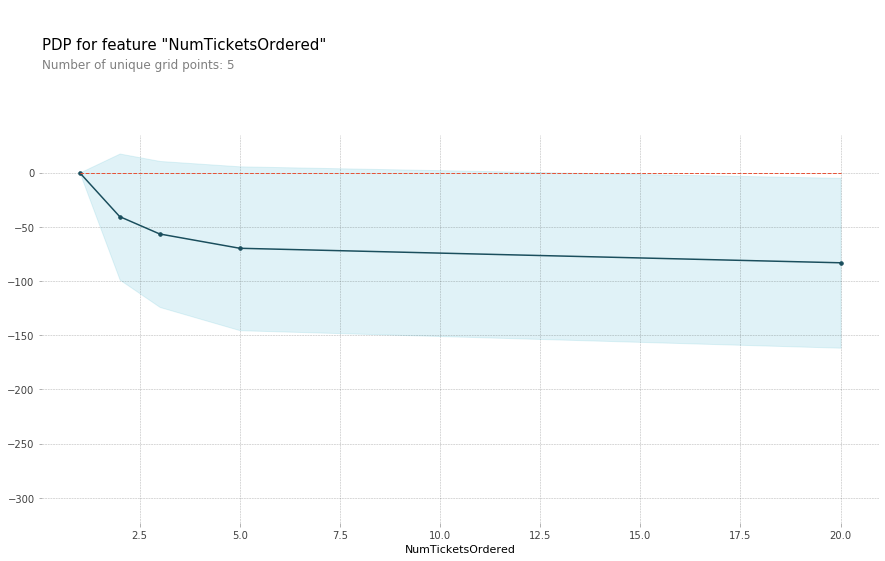

In [ ]:
# American NumTix PDP
isolated_american = pdp_isolate(
    model=model_a, 
    dataset=xva, 
    model_features=x_val.columns, 
    feature=feature3
)

pdp_plot(isolated_american, feature_name=feature3);

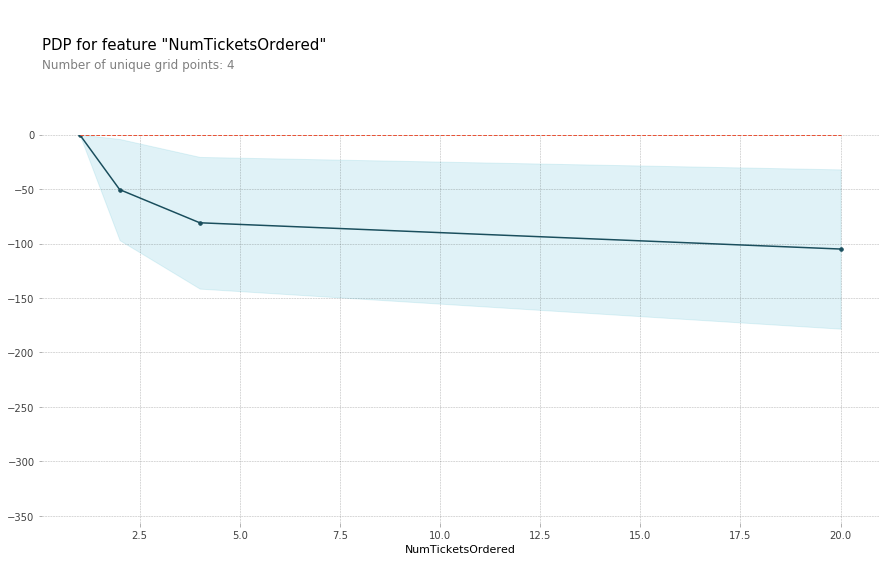

In [ ]:
# United NumTix PDP
isolated_united = pdp_isolate(
    model=model_u, 
    dataset=xvu, 
    model_features=x_val.columns, 
    feature=feature3
)

pdp_plot(isolated_united, feature_name=feature3);

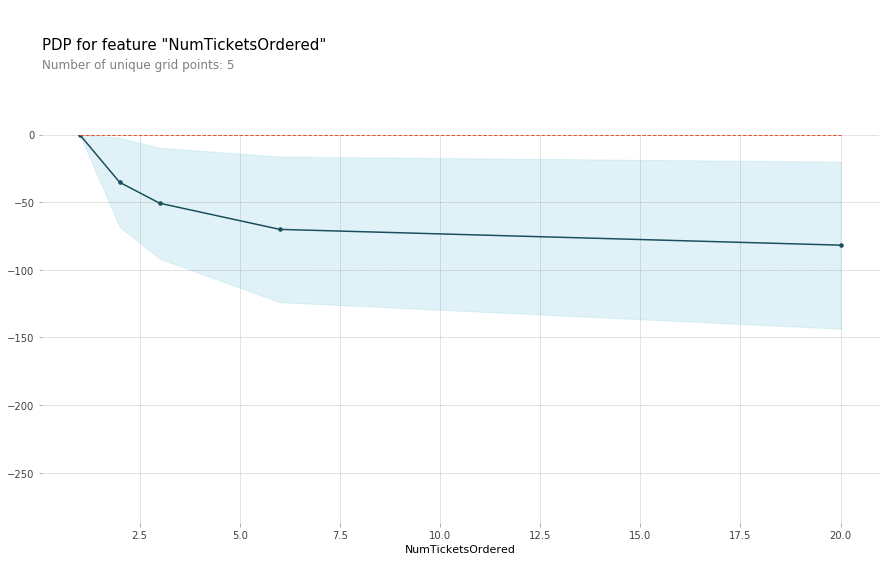

In [ ]:
# Jetblue NumTix PDP
isolated_jetblue = pdp_isolate(
    model=model_j, 
    dataset=xvj, 
    model_features=x_val.columns, 
    feature=feature3
)

pdp_plot(isolated_jetblue, feature_name=feature3);

### Part 4.3) Evaluate the different miles-to-price models and plot the line-of-best-fit between them

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f841ca82438>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f841cada2e8>})

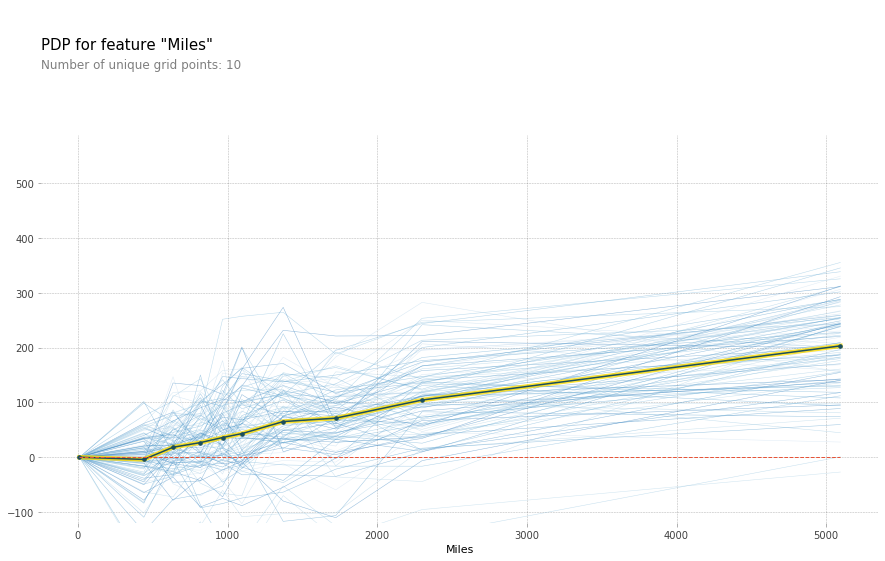

In [ ]:
feature4 = 'Miles'

isolated4 = pdp_isolate(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val.columns, 
    feature=feature4
)

pdp_plot(isolated4, feature_name=feature4, plot_lines=True, frac_to_plot=100)

### Part 4.4) Create a few PDP interaction box color-coded grids to evaluate the interactions that different combinations of features have on price-per-ticket target variable

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

Part 4.4.1 — PDP Interact, Miles & NumTicketsOrdered, Entire Dataset

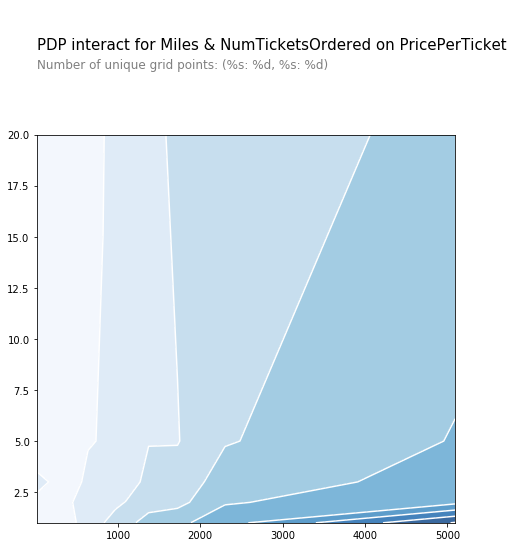

In [ ]:
eval_features = ['Miles', 'NumTicketsOrdered']

plot_params = {
    # plot title and subtitle
    'title': 'PDP interact for Miles & NumTicketsOrdered on PricePerTicket',
    'subtitle': 'Number of unique grid points: (%s: %d, %s: %d)',
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    # color for contour line
    'contour_color':  'white',
    'font_family': 'Arial',
    # matplotlib color map for interact plot
    'cmap': 'Blues',
    'inter_fill_alpha': 0.8,
    # fontsize for interact plot text
    'inter_fontsize': 9,
}

interaction = pdp_interact(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val.columns, 
    features=eval_features
)
try:
  pdp_interact_plot(interaction, plot_type='contour', feature_names=eval_features, plot_params=plot_params);
except:
  pass


Part 4.4.2 — PDP Interact, Miles & NumTicketsOrdered, Dataset where "Miles" <= 2000

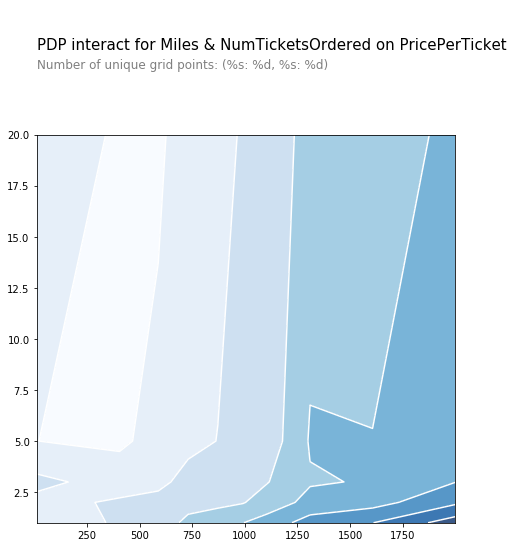

In [ ]:
eval_features = ['Miles', 'NumTicketsOrdered']

plot_params = {
    # plot title and subtitle
    'title': 'PDP interact for Miles & NumTicketsOrdered on PricePerTicket',
    'subtitle': 'Number of unique grid points: (%s: %d, %s: %d)',
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    # color for contour line
    'contour_color':  'white',
    'font_family': 'Arial',
    # matplotlib color map for interact plot
    'cmap': 'Blues',
    'inter_fill_alpha': 0.8,
    # fontsize for interact plot text
    'inter_fontsize': 9,
}

dataset = x_val_encoded[x_val_encoded['Miles'] <= 2000]

interaction = pdp_interact(
    model=model, 
    dataset=dataset, 
    model_features=x_val.columns, 
    features=eval_features
)
try:
  pdp_interact_plot(interaction, plot_type='contour', feature_names=eval_features, plot_params=plot_params);
except:
  pass


### Part 4.5) Create a 3D Interactive, Rotatable plot to provide a different style of visualization for the interaction between Miles/NumTicketsOrdered/PricePerTicket

In [ ]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[8], 
    index=features[6]
)

import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
    #cmap='Blues'
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[8]), 
        yaxis=dict(title=features[6]), 
        zaxis=dict(title='PricePerTicket')
    )
)

fig = go.Figure(surface, layout)
fig.show()

# PART 5 -- Shapley Values & Visualizations
Individual prediction explanation:
"Why did the model predict this for that instance?"

### Part 5.1) Create a few Force Plot Tree Explainers for individual instances in the dataset

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 266kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376821 sha256=7f7f2ef8211a74a91118ea05a63962e35e79231fe28ec17d6869e150448e809d
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


In [ ]:
row100000 = x_val.iloc[[150005]]
row100000

,MktID,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany
7043243,20184210618801,4,JFK,22,SNA,91,2454.0,2,1.0,DL


In [ ]:
row100000 = x_val.iloc[[150005]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pipeline_encoder.fit_transform(row100000))

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row100000
)

In [ ]:
row0 = x_val.iloc[[0]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pipeline_encoder.fit_transform(row0))

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row0
)

### Part 5.2) Define a function to predict the PricePerTicket given the input parameters -- output the price and a Force Plot to explain why the model predicted that price

In [ ]:
def predict(ItinID, MktID, MktCoupons, Quarter, Origin, OriginWac, Dest, DestWac, Miles, ContiguousUSA, NumTicketsOrdered, AirlineCompany):

  #ContiguousUSA = boolean dictionary

  #Miles = dictionary

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[ItinID, MktID, MktCoupons, Quarter, Origin, OriginWac, Dest, DestWac, Miles, ContiguousUSA, NumTicketsOrdered, AirlineCompany]], 
        columns=['ItinID', 'MktID', 'MktCoupons', 'Quarter', 'Origin', 'OriginWac', 'Dest', 'DestWac', 'Miles', 'ContiguousUSA', 'NumTicketsOrdered', 'AirlineCompany']
    )

    # Get the model's prediction
    pred = model.predict(df)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)

    # Get series with shap values, feature names, & feature values
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    result = f'${pred:,.0f} estimated price for per plane ticket. \n\n'
    result += f'Starting from baseline of ${explainer.expected_value:,.0f} \n'
    result += shaps.to_string()
    print(result)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=df
    )

#predict(201831887385, 201831887385014, 3, 3, 212.828543, 54, 241.760095, 63, 695.0, 2, 2.0, 268.789539)

In [ ]:
# WHY CAN'T I PLOT A DECISION TREE?
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
#import graphviz
#from sklearn.tree import export_graphviz
#model.fit(x_train_encoded, y_train)
#model = pipeline.named_steps['decisiontreeclassifier']
#encoder = pipeline.named_steps['onehotencoder']
#encoded_columns = encoder.transform(x_val).columns

#dot_data = export_graphviz(model, 
#                           out_file=None, 
#                           max_depth=3, 
#                           feature_names=encoded_columns,
#                           #class_names=model.decision_path, 
#                           impurity=False, 
#                           filled=True, 
#                           proportion=True, 
#                           rounded=True)   
#display(graphviz.Source(dot_data))